In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
training_set = "Lab01-Data/lab1_Ex3_data/lab1_Ex3_train.csv"
test_set = "Lab01-Data/lab1_Ex3_data/lab1_Ex3_test.csv"

In [11]:
training_data_frame = pd.read_csv(training_set)
test_data_frame = pd.read_csv(test_set)
train_data = [data[0:2] for data in training_data_frame.values]
train_label = np.array([data[2] for data in training_data_frame.values])
test_data = np.array(test_data_frame.values)
print(train_data)
print(train_label)
print(test_data)

[array([14, 39], dtype=int64), array([27, 36], dtype=int64), array([38, 81], dtype=int64), array([35, 67], dtype=int64), array([18, 32], dtype=int64), array([23, 31], dtype=int64), array([38, 81], dtype=int64), array([31, 48], dtype=int64), array([32, 54], dtype=int64), array([22, 31], dtype=int64), array([12,  4], dtype=int64), array([39, 26], dtype=int64), array([36,  6], dtype=int64), array([10,  7], dtype=int64), array([13,  5], dtype=int64), array([18,  9], dtype=int64), array([11,  6], dtype=int64), array([13,  5], dtype=int64), array([29, 15], dtype=int64), array([17,  7], dtype=int64)]
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[22 32]
 [37 42]
 [29 29]
 [38 48]
 [17 66]
 [17 37]
 [20 66]
 [11 65]
 [24 77]
 [21 42]]


In [64]:
def bayes(train_data, train_label, test_data):
    class_1 = []
    class_2 = []
    num_class_1 = 0.0
    num_class_2 = 0.0
    for i in range(len(train_data)):
        if train_label[i] == 1:
            class_1.append(train_data[i])
            num_class_1 += 1
        else:
            class_2.append(train_data[i])
            num_class_2 += 1
    p_1 = num_class_1/len(train_label)
    p_2 = num_class_2/len(train_label)
    # print(np.array(class_1).shape)
    mean_class_1 = np.mean(np.array(class_1), axis=0)
    mean_class_2 = np.mean(np.array(class_2),axis=0)
    var_class_1 = np.var(np.array(class_1),axis=0)
    var_class_2 = np.var(np.array(class_2),axis=0)
    std_class_1 = np.std(np.array(class_1),axis=0)
    std_class_2 = np.std(np.array(class_2),axis=0)
    def get_prob_1(data):
        return  np.exp(-np.power((data-mean_class_1),2)/(2*var_class_1))/(np.sqrt(2*np.pi)*std_class_1)
    def get_prob_2(data):
        return np.exp(-np.power((data-mean_class_2),2)/(2*var_class_2))/(np.sqrt(2*np.pi)*std_class_2)
    test_label = []
    for data in test_data:
        data = np.array(data)
        # p_list_1 是 P(feature1|class1), P(feature1|class1)
        p_list_1 = get_prob_1(data)
        p_list_2 = get_prob_2(data)
        if p_1*p_list_1[0]*p_list_1[1] > p_2*p_list_2[0]*p_list_2[1]:
            # print(abs(p_1*p_list_1[0]*p_list_1[1] - p_2*p_list_2[0]*p_list_2[1]))
            test_label.append(1)
        else:
            test_label.append(2)
    # print(test_label)
    return test_label
output_dict = {}
output_dict['Q1'] = bayes
bayes(train_data, train_label, test_data)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [65]:
training_error = bayes(train_data, train_label, train_data) - train_label
print(training_error)
print(abs(training_error).sum())
output_dict['Q2'] = abs(training_error).sum()/len(train_data)
output_dict['Q3'] = np.sort(np.array(bayes(train_data, train_label, test_data)))
print(output_dict['Q2'])
print(output_dict['Q3'])

[ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0]
1
0.05
[1 1 1 1 1 1 1 1 1 1]


In [106]:
# feature的分布在0~100间，遍历整个空间求得boundry
boundry = []
def bayes_for_Q4(train_data, train_label, test_data):
    class_1 = []
    class_2 = []
    num_class_1 = 0.0
    num_class_2 = 0.0
    for i in range(len(train_data)):
        if train_label[i] == 1:
            class_1.append(train_data[i])
            num_class_1 += 1
        else:
            class_2.append(train_data[i])
            num_class_2 += 1
    p_1 = num_class_1/len(train_label)
    p_2 = num_class_2/len(train_label)
    # print(np.array(class_1).shape)
    mean_class_1 = np.mean(np.array(class_1), axis=0)
    mean_class_2 = np.mean(np.array(class_2),axis=0)
    var_class_1 = np.var(np.array(class_1),axis=0)
    var_class_2 = np.var(np.array(class_2),axis=0)
    std_class_1 = np.std(np.array(class_1),axis=0)
    std_class_2 = np.std(np.array(class_2),axis=0)
    def get_prob_1(data):
        return  np.exp(-np.power((data-mean_class_1),2)/(2*var_class_1))/(np.sqrt(2*np.pi)*std_class_1)
    def get_prob_2(data):
        return np.exp(-np.power((data-mean_class_2),2)/(2*var_class_2))/(np.sqrt(2*np.pi)*std_class_2)
    for i in range(100):
        for j in range(100):
            data = np.array([i,j])
            # p_list_1 是 P(feature1|class1), P(feature1|class1)
            p_list_1 = get_prob_1(data)
            p_list_2 = get_prob_2(data)
            if abs(p_1*p_list_1[0]*p_list_1[1] - p_2*p_list_2[0]*p_list_2[1]) <= 0.00002:
                boundry.append(data)
    print(boundry)
    return boundry
boundry = bayes_for_Q4(train_data, train_label, test_data)       

[array([ 0, 23]), array([ 0, 24]), array([ 0, 25]), array([ 0, 26]), array([ 0, 27]), array([ 0, 28]), array([ 0, 29]), array([ 0, 30]), array([ 0, 31]), array([ 0, 32]), array([ 0, 33]), array([ 0, 34]), array([ 0, 35]), array([ 0, 36]), array([ 0, 37]), array([ 0, 38]), array([ 0, 39]), array([ 0, 40]), array([ 0, 41]), array([ 0, 42]), array([ 0, 43]), array([ 0, 44]), array([ 0, 45]), array([ 0, 46]), array([ 0, 47]), array([ 0, 48]), array([ 0, 49]), array([ 0, 50]), array([ 0, 51]), array([ 0, 52]), array([ 0, 53]), array([ 0, 54]), array([ 0, 55]), array([ 0, 56]), array([ 0, 57]), array([ 0, 58]), array([ 0, 59]), array([ 0, 60]), array([ 0, 61]), array([ 0, 62]), array([ 0, 63]), array([ 0, 64]), array([ 0, 65]), array([ 0, 66]), array([ 0, 67]), array([ 0, 68]), array([ 0, 69]), array([ 0, 70]), array([ 0, 71]), array([ 0, 72]), array([ 0, 73]), array([ 0, 74]), array([ 0, 75]), array([ 0, 76]), array([ 0, 77]), array([ 0, 78]), array([ 0, 79]), array([ 0, 80]), array([ 0, 81

In [107]:
boundry_x = [bound[0] for bound in boundry ]
boundry_y = [bound[1] for bound in boundry ]

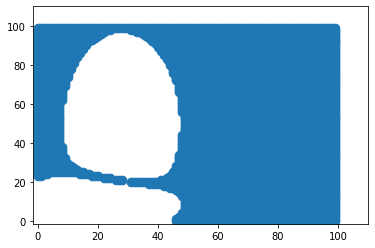

In [108]:
plt.scatter(boundry_x, boundry_y, s=75)
plt.xlim(-1.5, 110)
plt.ylim(-1.5, 110)
plt.show()